<a href="https://colab.research.google.com/github/ngozanlouisano/atom-script/blob/master/cnn_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importer les packages
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
# Chargement la base de donnée et l'insérer dans la training set et test set
(x_train, y_train), (x_test, y_test)= cifar10.load_data()


170498071/170498071 [==============================] - 13s 0us/step


[1]


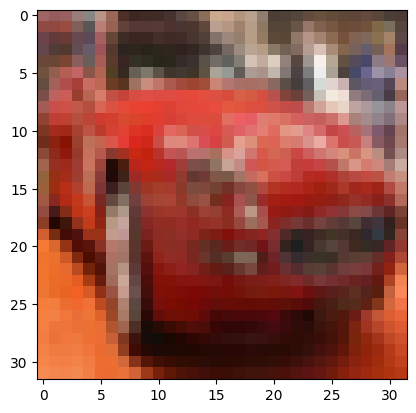

In [4]:
# visualiser le contenue une voiture
plt.imshow(x_train[5])
print(y_train [5])

In [5]:
x_train[9]

array([[[125, 125, 116],
        [110, 101,  91],
        [102,  90,  83],
        ...,
        [202, 207, 214],
        [200, 205, 212],
        [202, 208, 214]],

       [[142, 146, 142],
        [146, 144, 139],
        [176, 172, 170],
        ...,
        [195, 201, 205],
        [198, 205, 209],
        [204, 211, 215]],

       [[180, 185, 183],
        [143, 146, 146],
        [156, 157, 157],
        ...,
        [122, 111, 113],
        [139, 128, 131],
        [158, 147, 150]],

       ...,

       [[104,  82,  41],
        [101,  80,  39],
        [101,  81,  38],
        ...,
        [126, 103,  67],
        [126, 103,  69],
        [125, 101,  68]],

       [[104,  81,  40],
        [105,  84,  41],
        [109,  88,  43],
        ...,
        [138, 113,  78],
        [137, 113,  80],
        [137, 112,  81]],

       [[105,  83,  42],
        [108,  87,  45],
        [115,  94,  50],
        ...,
        [143, 117,  82],
        [143, 116,  84],
        [144, 116,  86]]

In [6]:
# Normaliser les photos pour avoir les valeur 0 et 1
x_train = x_train/255.0
x_test =  x_test/255.0

In [7]:
x_train[5]

array([[[0.62352941, 0.4       , 0.39607843],
        [0.58823529, 0.35686275, 0.37254902],
        [0.6       , 0.37254902, 0.38039216],
        ...,
        [0.35686275, 0.27843137, 0.21960784],
        [0.29019608, 0.24705882, 0.21568627],
        [0.29803922, 0.22745098, 0.21568627]],

       [[0.55686275, 0.29411765, 0.26666667],
        [0.57254902, 0.28235294, 0.25882353],
        [0.60784314, 0.29803922, 0.25490196],
        ...,
        [0.49803922, 0.41176471, 0.27843137],
        [0.47843137, 0.43529412, 0.36470588],
        [0.3372549 , 0.27058824, 0.23921569]],

       [[0.42745098, 0.2627451 , 0.29411765],
        [0.38823529, 0.22745098, 0.23529412],
        [0.41176471, 0.23137255, 0.20392157],
        ...,
        [0.5372549 , 0.43921569, 0.31372549],
        [0.63921569, 0.51764706, 0.41176471],
        [0.36470588, 0.28235294, 0.27843137]],

       ...,

       [[0.95686275, 0.50588235, 0.2745098 ],
        [0.94117647, 0.48235294, 0.25490196],
        [0.94509804, 0

In [8]:
# Création mon modèle 
model= Sequential()

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
# Créer le réseau de neurone Convolution (CNN)
model.add(Conv2D(256,(3,3), input_shape=x_train.shape[1:]))
  # fonction d'activation 
model.add(Activation('relu'))
  # MaxPooling 
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
# Ajouter une autre couche de Convolution (CNN)/ pour améliorer notre modèle
model.add(Conv2D(256,(3,3)))
  # fonction d'activation 
model.add(Activation('relu'))
  # MaxPooling 
model.add(MaxPooling2D(pool_size=(2,2)))


In [14]:
# Flatten
model.add(Flatten())

In [15]:
# Le complétement connecté
  # course de 64 nneu
model.add(Dense(64))
 # une course de sortie 10  parce que on a 10 categories de photo
model.add(Dense(10))
  # fonction d'activation sigmoid
model.add(Activation('sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['sparse_categorical_accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 activation (Activation)     (None, 30, 30, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       590080    
                                                                 
 activation_1 (Activation)   (None, 13, 13, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                    

In [17]:
# Entrainer le modèle
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 23s 8ms/step - loss: 1.4491 - sparse_categorical_accuracy: 0.4816
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1480 - sparse_categorical_accuracy: 0.5983
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0441 - sparse_categorical_accuracy: 0.6376
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9928 - sparse_categorical_accuracy: 0.6561
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9478 - sparse_categorical_accuracy: 0.6718
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9164 - sparse_categorical_accuracy: 0.6808
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8892 - sparse_categorical_accuracy: 0.6911
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8711 - sparse_categorical_accuracy: 0.6975
Epoch 9/10
1563/1563 [==

In [18]:
# l'appliquer sur les donner de test
test_accuracy, test_loss = model.evaluate(x_test, y_test)
print(f"Test accuracy {test_accuracy}  et Test loss {test_loss}" )

313/313 [==============================] - 1s 4ms/step - loss: 0.9270 - sparse_categorical_accuracy: 0.6770
Test accuracy 0.927039623260498  et Test loss 0.6769999861717224
